In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import time
import quandl
import datetime
from sklearn.preprocessing import  MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

# univariate mlp example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
import pickle

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

In [3]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)



In [4]:
from library import get_data, normalize

In [5]:
indices = ["^GSPC","SPY","^IXIC", "^DJI", "^GDAXI", "^FTSE","^FCHI", "^N225","^HSI", "^AXJO","ORB"]


In [86]:
start_date = "2003-01-01"
end_date = "2017-01-01"
dates = pd.date_range(start_date, end_date) 

In [87]:
df_index = get_data(indices, dates)

In [88]:
df_index.fillna(method='ffill', inplace=True)# fill Nan with previos value as order is ascending date 
df_index.fillna(method='bfill', inplace=True)

In [89]:
X=df_index[["SPY","^IXIC", "^DJI", "^GDAXI", "^FTSE","^FCHI", "^N225","^HSI", "^AXJO","ORB"]]
y=df_index[["^GSPC"]]

In [90]:
X_normalized=normalize(X,X.columns)
y_normalized=normalize(y,y.columns)

In [91]:
df_final = X_normalized.join(y_normalized)

In [92]:
data=df_final.values

In [93]:
n_steps = 5
# convert into input/output
X, y = split_sequences(data, n_steps)

In [94]:
n_features = X.shape[2]

In [95]:
train_size = int(len(X) * 0.80)
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(X)]

In [97]:
# define model
model = Sequential()
model.add(LSTM(50, activation='tanh', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


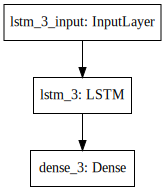

In [98]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [99]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 50)                12200     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 12,251
Trainable params: 12,251
Non-trainable params: 0
_________________________________________________________________


In [100]:
# fit model
history=model.fit(X_train, y_train, \
                  epochs=1000, verbose=2, validation_split=0.15, shuffle=False)

Train on 2393 samples, validate on 423 samples
Epoch 1/1000
 - 2s - loss: 0.0018 - val_loss: 0.0043
Epoch 2/1000
 - 0s - loss: 7.4877e-04 - val_loss: 0.0156
Epoch 3/1000
 - 0s - loss: 0.0019 - val_loss: 0.0370
Epoch 4/1000
 - 0s - loss: 0.0038 - val_loss: 0.0143
Epoch 5/1000
 - 0s - loss: 0.0028 - val_loss: 0.0107
Epoch 6/1000
 - 0s - loss: 0.0024 - val_loss: 0.0125
Epoch 7/1000
 - 0s - loss: 0.0022 - val_loss: 0.0137
Epoch 8/1000
 - 0s - loss: 0.0021 - val_loss: 0.0133
Epoch 9/1000
 - 0s - loss: 0.0019 - val_loss: 0.0125
Epoch 10/1000
 - 0s - loss: 0.0018 - val_loss: 0.0110
Epoch 11/1000
 - 0s - loss: 0.0015 - val_loss: 0.0095
Epoch 12/1000
 - 0s - loss: 0.0013 - val_loss: 0.0077
Epoch 13/1000
 - 0s - loss: 0.0011 - val_loss: 0.0060
Epoch 14/1000
 - 0s - loss: 9.1774e-04 - val_loss: 0.0043
Epoch 15/1000
 - 0s - loss: 7.3304e-04 - val_loss: 0.0027
Epoch 16/1000
 - 0s - loss: 6.0563e-04 - val_loss: 0.0013
Epoch 17/1000
 - 0s - loss: 5.4915e-04 - val_loss: 3.4254e-04
Epoch 18/1000
 - 0s 

Epoch 139/1000
 - 0s - loss: 2.4964e-04 - val_loss: 0.0026
Epoch 140/1000
 - 0s - loss: 2.9817e-04 - val_loss: 3.4347e-04
Epoch 141/1000
 - 0s - loss: 2.2112e-04 - val_loss: 2.0866e-04
Epoch 142/1000
 - 0s - loss: 1.3095e-04 - val_loss: 0.0022
Epoch 143/1000
 - 0s - loss: 1.6996e-04 - val_loss: 0.0039
Epoch 144/1000
 - 0s - loss: 1.9207e-04 - val_loss: 0.0014
Epoch 145/1000
 - 0s - loss: 1.9096e-04 - val_loss: 1.7961e-04
Epoch 146/1000
 - 0s - loss: 2.4298e-04 - val_loss: 7.6594e-05
Epoch 147/1000
 - 0s - loss: 2.5764e-04 - val_loss: 9.1421e-05
Epoch 148/1000
 - 0s - loss: 2.6698e-04 - val_loss: 9.4024e-05
Epoch 149/1000
 - 0s - loss: 2.3126e-04 - val_loss: 5.5001e-05
Epoch 150/1000
 - 0s - loss: 1.7198e-04 - val_loss: 2.5888e-04
Epoch 151/1000
 - 0s - loss: 1.2795e-04 - val_loss: 0.0013
Epoch 152/1000
 - 0s - loss: 1.4009e-04 - val_loss: 0.0023
Epoch 153/1000
 - 0s - loss: 2.0697e-04 - val_loss: 0.0014
Epoch 154/1000
 - 0s - loss: 3.0486e-04 - val_loss: 6.0934e-04
Epoch 155/1000
 - 0s

 - 1s - loss: 2.1418e-04 - val_loss: 3.5329e-04
Epoch 274/1000
 - 0s - loss: 2.5612e-04 - val_loss: 1.8051e-04
Epoch 275/1000
 - 1s - loss: 1.7404e-04 - val_loss: 8.5466e-04
Epoch 276/1000
 - 1s - loss: 7.6166e-05 - val_loss: 0.0043
Epoch 277/1000
 - 1s - loss: 1.8144e-04 - val_loss: 0.0046
Epoch 278/1000
 - 1s - loss: 1.2807e-04 - val_loss: 0.0012
Epoch 279/1000
 - 1s - loss: 1.8802e-04 - val_loss: 4.5698e-04
Epoch 280/1000
 - 0s - loss: 2.0093e-04 - val_loss: 2.3858e-04
Epoch 281/1000
 - 1s - loss: 1.1226e-04 - val_loss: 0.0018
Epoch 282/1000
 - 0s - loss: 1.4388e-04 - val_loss: 0.0047
Epoch 283/1000
 - 0s - loss: 2.1349e-04 - val_loss: 0.0030
Epoch 284/1000
 - 0s - loss: 8.2858e-05 - val_loss: 8.8118e-04
Epoch 285/1000
 - 1s - loss: 8.9656e-05 - val_loss: 4.2184e-04
Epoch 286/1000
 - 0s - loss: 7.7148e-05 - val_loss: 8.6252e-04
Epoch 287/1000
 - 0s - loss: 3.7209e-05 - val_loss: 0.0021
Epoch 288/1000
 - 0s - loss: 4.9168e-05 - val_loss: 0.0028
Epoch 289/1000
 - 0s - loss: 5.6793e-05

Epoch 407/1000
 - 1s - loss: 1.7909e-04 - val_loss: 7.0392e-05
Epoch 408/1000
 - 1s - loss: 1.2125e-04 - val_loss: 4.9502e-04
Epoch 409/1000
 - 1s - loss: 6.5611e-05 - val_loss: 0.0033
Epoch 410/1000
 - 1s - loss: 1.1493e-04 - val_loss: 0.0035
Epoch 411/1000
 - 1s - loss: 9.7836e-05 - val_loss: 0.0013
Epoch 412/1000
 - 1s - loss: 7.0599e-05 - val_loss: 5.2029e-05
Epoch 413/1000
 - 1s - loss: 1.0601e-04 - val_loss: 1.4281e-04
Epoch 414/1000
 - 1s - loss: 9.3465e-05 - val_loss: 6.7364e-05
Epoch 415/1000
 - 1s - loss: 5.5703e-05 - val_loss: 0.0011
Epoch 416/1000
 - 1s - loss: 5.8323e-05 - val_loss: 0.0029
Epoch 417/1000
 - 0s - loss: 8.2582e-05 - val_loss: 0.0020
Epoch 418/1000
 - 0s - loss: 5.2437e-05 - val_loss: 2.0808e-04
Epoch 419/1000
 - 1s - loss: 6.9959e-05 - val_loss: 9.2380e-05
Epoch 420/1000
 - 1s - loss: 7.8567e-05 - val_loss: 5.1164e-05
Epoch 421/1000
 - 1s - loss: 6.5766e-05 - val_loss: 3.8633e-04
Epoch 422/1000
 - 0s - loss: 4.9795e-05 - val_loss: 0.0017
Epoch 423/1000
 - 1s

Epoch 541/1000
 - 1s - loss: 9.3978e-05 - val_loss: 3.6694e-04
Epoch 542/1000
 - 1s - loss: 1.1561e-04 - val_loss: 1.9020e-04
Epoch 543/1000
 - 1s - loss: 7.0324e-05 - val_loss: 2.1978e-04
Epoch 544/1000
 - 1s - loss: 4.6850e-05 - val_loss: 0.0027
Epoch 545/1000
 - 1s - loss: 9.3524e-05 - val_loss: 0.0051
Epoch 546/1000
 - 1s - loss: 6.6974e-05 - val_loss: 0.0018
Epoch 547/1000
 - 1s - loss: 4.2372e-05 - val_loss: 6.9320e-04
Epoch 548/1000
 - 1s - loss: 5.1418e-05 - val_loss: 3.1242e-04
Epoch 549/1000
 - 1s - loss: 5.1976e-05 - val_loss: 7.0203e-04
Epoch 550/1000
 - 1s - loss: 4.4630e-05 - val_loss: 0.0021
Epoch 551/1000
 - 1s - loss: 4.7493e-05 - val_loss: 0.0031
Epoch 552/1000
 - 1s - loss: 4.7228e-05 - val_loss: 0.0022
Epoch 553/1000
 - 0s - loss: 4.7506e-05 - val_loss: 4.6335e-04
Epoch 554/1000
 - 1s - loss: 8.1054e-05 - val_loss: 2.2302e-04
Epoch 555/1000
 - 0s - loss: 1.1339e-04 - val_loss: 6.9816e-04
Epoch 556/1000
 - 1s - loss: 1.2218e-04 - val_loss: 1.5494e-04
Epoch 557/1000
 

Epoch 675/1000
 - 1s - loss: 1.4230e-04 - val_loss: 0.0023
Epoch 676/1000
 - 1s - loss: 8.5577e-05 - val_loss: 0.0010
Epoch 677/1000
 - 1s - loss: 4.4748e-05 - val_loss: 8.1128e-04
Epoch 678/1000
 - 1s - loss: 4.1136e-05 - val_loss: 0.0010
Epoch 679/1000
 - 1s - loss: 3.4961e-05 - val_loss: 0.0014
Epoch 680/1000
 - 1s - loss: 4.0596e-05 - val_loss: 0.0016
Epoch 681/1000
 - 1s - loss: 5.2559e-05 - val_loss: 7.2548e-04
Epoch 682/1000
 - 1s - loss: 8.4150e-05 - val_loss: 3.4061e-04
Epoch 683/1000
 - 1s - loss: 8.7629e-05 - val_loss: 7.2570e-04
Epoch 684/1000
 - 1s - loss: 5.0566e-05 - val_loss: 0.0027
Epoch 685/1000
 - 1s - loss: 9.0961e-05 - val_loss: 0.0061
Epoch 686/1000
 - 1s - loss: 1.1358e-04 - val_loss: 5.0101e-04
Epoch 687/1000
 - 1s - loss: 3.6409e-05 - val_loss: 9.1633e-05
Epoch 688/1000
 - 1s - loss: 3.9688e-05 - val_loss: 2.7863e-04
Epoch 689/1000
 - 1s - loss: 2.6618e-05 - val_loss: 9.3849e-04
Epoch 690/1000
 - 0s - loss: 2.4830e-05 - val_loss: 0.0015
Epoch 691/1000
 - 1s - l

Epoch 808/1000
 - 0s - loss: 2.0056e-05 - val_loss: 8.1262e-05
Epoch 809/1000
 - 1s - loss: 2.8108e-05 - val_loss: 4.4615e-05
Epoch 810/1000
 - 1s - loss: 3.1170e-05 - val_loss: 2.2062e-04
Epoch 811/1000
 - 1s - loss: 2.3040e-05 - val_loss: 7.5753e-04
Epoch 812/1000
 - 0s - loss: 6.4855e-05 - val_loss: 7.4949e-04
Epoch 813/1000
 - 1s - loss: 8.2419e-05 - val_loss: 8.0832e-05
Epoch 814/1000
 - 0s - loss: 4.1351e-05 - val_loss: 3.4364e-04
Epoch 815/1000
 - 1s - loss: 4.2198e-05 - val_loss: 2.0061e-04
Epoch 816/1000
 - 1s - loss: 3.6588e-05 - val_loss: 4.9048e-05
Epoch 817/1000
 - 1s - loss: 3.0996e-05 - val_loss: 5.6199e-04
Epoch 818/1000
 - 1s - loss: 4.4264e-05 - val_loss: 0.0012
Epoch 819/1000
 - 0s - loss: 5.8925e-05 - val_loss: 5.3908e-04
Epoch 820/1000
 - 0s - loss: 4.6662e-05 - val_loss: 1.1436e-04
Epoch 821/1000
 - 1s - loss: 4.7679e-05 - val_loss: 7.8778e-05
Epoch 822/1000
 - 0s - loss: 8.8652e-05 - val_loss: 3.0141e-05
Epoch 823/1000
 - 1s - loss: 5.2604e-05 - val_loss: 2.3529e

Epoch 940/1000
 - 1s - loss: 5.6363e-05 - val_loss: 8.5707e-04
Epoch 941/1000
 - 1s - loss: 6.8840e-05 - val_loss: 0.0012
Epoch 942/1000
 - 1s - loss: 6.8252e-05 - val_loss: 3.0445e-04
Epoch 943/1000
 - 1s - loss: 4.3901e-05 - val_loss: 4.7109e-05
Epoch 944/1000
 - 1s - loss: 1.0587e-04 - val_loss: 1.2990e-04
Epoch 945/1000
 - 1s - loss: 9.5994e-05 - val_loss: 4.3760e-05
Epoch 946/1000
 - 1s - loss: 5.6157e-05 - val_loss: 1.8904e-04
Epoch 947/1000
 - 1s - loss: 5.9204e-05 - val_loss: 3.1132e-04
Epoch 948/1000
 - 1s - loss: 5.6773e-05 - val_loss: 1.1294e-04
Epoch 949/1000
 - 1s - loss: 2.9813e-05 - val_loss: 6.9627e-05
Epoch 950/1000
 - 1s - loss: 4.0158e-05 - val_loss: 1.4196e-04
Epoch 951/1000
 - 1s - loss: 3.3998e-05 - val_loss: 4.8464e-04
Epoch 952/1000
 - 1s - loss: 5.1879e-05 - val_loss: 6.0818e-04
Epoch 953/1000
 - 1s - loss: 5.2859e-05 - val_loss: 1.8451e-04
Epoch 954/1000
 - 0s - loss: 2.9242e-05 - val_loss: 6.9958e-05
Epoch 955/1000
 - 1s - loss: 4.1772e-05 - val_loss: 9.8879e

In [101]:
mytime = time.strftime("%Y_%m_%d_%H_%M")
modname = 'Multi_LSTM_sp500_tanh' + mytime 

In [102]:
#H:\Dropbox\python\deep_learning_time_series_forecasting\code
with open('H:\Dropbox\python\deep_learning_time_series_forecasting\code\histories\\'
          + modname + '.pkl' , 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

(0, 0.008)

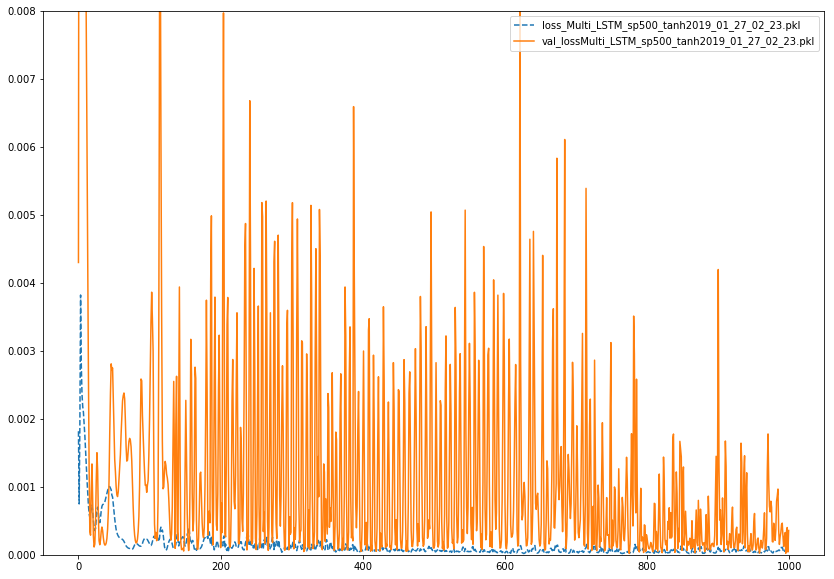

In [103]:
histories = ['Multi_LSTM_sp500_tanh2019_01_27_02_23.pkl']
plt.figure(figsize=(14,10))
for val in histories:
    with open('H:\Dropbox\python\deep_learning_time_series_forecasting\code\histories\\' + val , 'rb') as file_pi:
        thepickle = pickle.load(file_pi)
        plt.plot(thepickle["loss"],label ='loss_' + val,linestyle='--')
        plt.plot(thepickle["val_loss"],label='val_loss' + val)


plt.legend()
plt.ylim(0, 0.008)

In [104]:
yhat = model.predict(X_test, verbose=2)

In [105]:
max_value = df_index["^GSPC"].max()
min_value = df_index["^GSPC"].min()

In [106]:
pred=pd.DataFrame(yhat, columns=['pred'])
real=pd.DataFrame(y_test, columns=['real'])

In [107]:
max_value, min_value

(2271.719971, 676.53002900000001)

In [108]:
pred['prediction']= pred['pred'].map(lambda a: (a * (max_value - min_value)) + min_value)

In [109]:
real['real_value']= real['real'].map(lambda a: (a * (max_value - min_value)) + min_value)

In [110]:
final=pred.join(real)

In [111]:
final_p=final['prediction'].values
final_r=final['real_value'].values

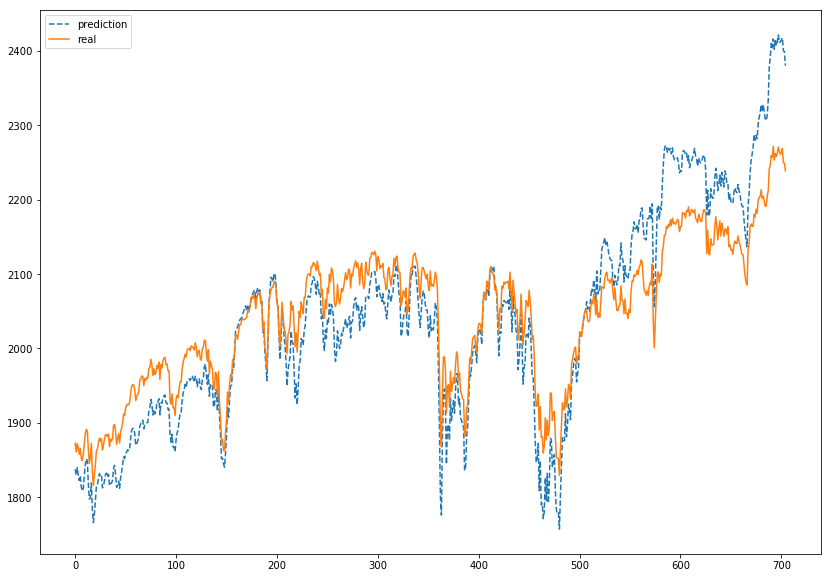

In [112]:
plt.figure(figsize=(14,10))
#plt.plot(raw_seq,label ='original' )
plt.plot(final_p,label ='prediction' ,linestyle='--')
plt.plot(final_r,label='real' )
plt.legend()

In [113]:
from sklearn.metrics import r2_score, mean_squared_error

In [114]:
r2_score(final_p, final_r) 

0.8403974298089435

In [115]:
mean_squared_error(final_p, final_r) 

3225.5755356638183